## Embedding,  Vector Database Vector Search

#### Use Case of Vector Database 
- Similarity Search: Text, images, audio 
    - De Duplication 
    - Semantic match rather than keyword match 
    - Very useful of knowledge base Q/A
- Recommendation Engines 
- Finding Security Threads 
    - Vectorizing virus binaries and finding anomalies 

### Vector Search Strategies 
- Exact Search 
    - K-Nearest Neighbor 
- Approximate Search
    - Approximate Nearest Neighbor 
        - Trade accuracy for speed gains 
        - Example of Speed Indexing Algorithm 
            -   Tree Based ANNOY by Spotify 
            - Proximity Graphs : HNSW 
            - Clustering : FAISS by facebook 
            - Hashing : LSH 
            - Vector Compression :SCaNN by google 



#### Hoe measure Two Vector is similar or not ? 
- Distance Matrix 
- Similarity Matrix 

FAISS : Face book AI Similarity Search 
HNSW : Hierarchical Navigation Small Worlds 



### Filtering 

### Vectorize Text into Embedding Vector

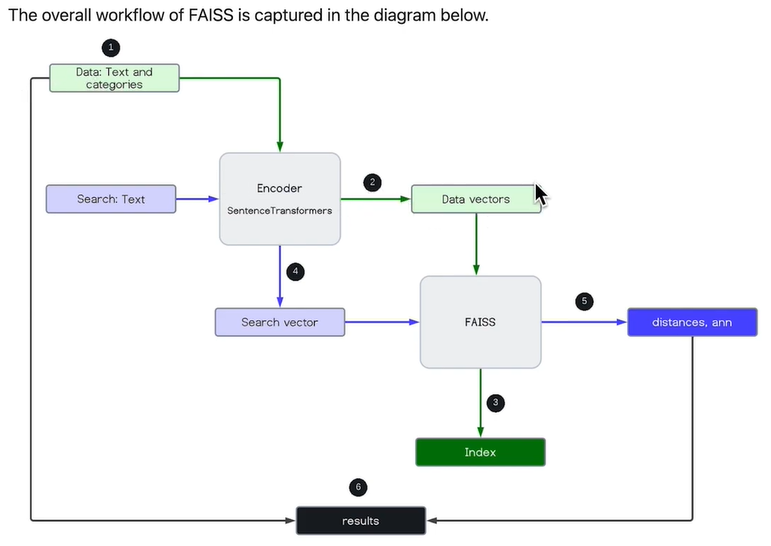

In [9]:
from pathlib  import Path
import pandas as pd

In [10]:
CACHE_DATASET = Path("./cache/Datasets")

In [65]:
pdf = pd.read_csv(CACHE_DATASET/'labelled_newscatcher_dataset.csv', sep=';')
pdf['id'] = range(len(pdf))

In [66]:
from sentence_transformers  import InputExample
pdf_subset = pdf.head(1000)
faiss_train_example = pdf_subset.apply(lambda x:InputExample(texts=[x["title"]]), axis=1).to_list()

In [67]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer(
    "all-MiniLM-L6-v2", 
    cache_folder = CACHE_DATASET
)
faiss_title_embedding = model.encode(pdf_subset['title'].values.tolist())
len(faiss_title_embedding), len(faiss_train_example)

(1000, 1000)

In [68]:
faiss_train_example[0].texts

["A closer look at water-splitting's solar fuel potential"]

### Saving Embeddinfg Vectors to Faiss Index

In [69]:
import numpy as np 
import faiss

In [76]:
pdf_to_index = pdf_subset.set_index(['id'], drop=False)
id_index=np.array(pdf_to_index.id.values).flatten().astype("int")
content_encoded_normalized = faiss_title_embedding.copy()
faiss.normalize_L2(content_encoded_normalized)

index_content = faiss.IndexIDMap(faiss.IndexFlatIP(len(faiss_title_embedding[0])))
index_content.add_with_ids(content_encoded_normalized, id_index)

### Search for Relavent Document 

In [77]:
def search_content(query, pdf_to_index, k=3):
    query_vector= model.encode([query]) 
    faiss.normalize_L2 (query_vector)
# We set k to limit the number of vectors we want to return 
    top_k= index_content.search(query_vector, k)
    ids = top_k[1][0].tolist()
    similarities = top_k[0][0].tolist()
    results = pdf_to_index.loc[ids]
    results["similarities"] = similarities
    return results

In [78]:
search_content('animal', pdf_to_index)

,topic,link,domain,published_date,title,lang,id,similarities
id,,,,,,,,
176,TECHNOLOGY,https://www.pushsquare.com/news/2020/08/random...,pushsquare.com,2020-08-03 16:30:00,Random: You Can Pick Up and Pet Cats in Assass...,en,176,0.391902
975,HEALTH,https://www.news-medical.net/news/20200813/Res...,news-medical.net,2020-08-13 05:18:00,Researchers explore social behavior of animals...,en,975,0.376784
99,TECHNOLOGY,https://www.gematsu.com/2020/08/ghostwire-toky...,gematsu.com,2020-08-07 16:43:13,Ghostwire: Tokyo confirms dog petting,en,99,0.344058


## ChromaDB and Vector Search 